### Imports

In [1]:
#importing things
import pandas as pd
import numpy as np
import csv
import pylab as pl
import matplotlib.pyplot as plt
import copy
import scipy
from collections import OrderedDict
import seaborn as sns
from matplotlib.ticker import FixedLocator, FixedFormatter
from scipy.special import comb
from matplotlib.colors import LogNorm
from matplotlib.patches import Patch
import matplotlib as mpl
import matplotlib.lines as lines

plt.rcParams.update({'font.size': 8})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams.update({'xtick.labelsize': 7})
plt.rcParams.update({'ytick.labelsize': 7})
plt.rcParams['scatter.edgecolors'] = 'black'
plt.rcParams['axes.linewidth'] = 0.5

### Load first order coefficients

In [2]:
h1_linear = pd.read_table('ACE2_4order_biochem.txt',names=['Term','ACE2_Effect','ACE2_SE','ACE2_95CI_low','ACE2_95CI_hi'],skiprows=[0,1,2,3],index_col=False)
first_order = h1_linear[~h1_linear["Term"].str.contains(',')]
first_order['Term'] = first_order['Term'].replace({'1':'339','2':'371','3':'373','4':'375','5':'417','6':'440','7':'446','8':'477','9':'478','10':'484','11':'493','12':'496','13':'498','14':'501','15':'505'})
first_order.head()

/Users/angelaphillips/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Term,ACE2_Effect,ACE2_SE,ACE2_95CI_low,ACE2_95CI_hi
0,339,0.032009,0.026969,2.352850e-01,-0.081496
1,371,-0.026243,0.026970,3.305331e-01,-0.139749
2,373,-0.040732,0.026969,1.309766e-01,-0.154237
3,375,0.112452,0.026970,3.059877e-05,-0.001054
4,417,-0.410706,0.026970,3.543983e-52,-0.524212


### Load structure with selected regions and mutated residues

In [3]:
#pick an antigen
antigen = "ACE2"

#import stuff
from pymol import cmd
#load pdb
#using 7WPB: Crystal Structure of omicron RBD with ACE2, 2.79 A
if antigen == "ACE2":
    cmd.fetch('7WPB')
    cmd.hide('everything')
    ACE2 = cmd.select('ACE2', 'chain D')
    ##########################
    #create selections for mutated residues
    mut1 = cmd.select('mut339',('chain A and resi 336'))
    mut2 = cmd.select('mut371',('chain A and resi 368'))
    mut3 = cmd.select('mut373',('chain A and resi 370'))
    mut4 = cmd.select('mut375',('chain A and resi 372'))
    mut5 = cmd.select('mut417',('chain A and resi 414'))
    mut6 = cmd.select('mut440',('chain A and resi 437'))
    mut7 = cmd.select('mut446',('chain A and resi 443'))
    mut8 = cmd.select('mut477',('chain A and resi 474'))
    mut9 = cmd.select('mut478',('chain A and resi 475'))
    mut10 = cmd.select('mut484',('chain A and resi 481'))
    mut11 = cmd.select('mut493',('chain A and resi 490'))
    mut12 = cmd.select('mut496',('chain A and resi 493'))
    mut13 = cmd.select('mut498',('chain A and resi 495'))
    mut14 = cmd.select('mut501',('chain A and resi 498'))
    mut15 = cmd.select('mut505',('chain A and resi 503'))
    mutations = ['mut339','mut371','mut373','mut375','mut417','mut440','mut446','mut477','mut478','mut484','mut493','mut496','mut498','mut501','mut505']
    allmut = cmd.select('allmut',('chain A and (resi 339 or resi 371 or resi 373 or resi 375 or resi 417 or resi 440 or resi 446 or resi 477 or resi 478 or resi 484 or resi 493 or resi 496 or resi 498 or resi 501 or resi 505)'))
    ##########################
    #display
    #coloring
#     cmd.show_as('cartoon',"monoA1")
#     cmd.color('gray30', "monoA1")
#     cmd.orient()
    #save image if desired
    cmd.png('/tmp/foo.png', ray=1)
    from IPython.display import Image
    Image(filename='/tmp/foo.png')

 PyMOL not running, entering library mode (experimental)


### Adding buried SA from ChimeraX

In [10]:
first_order['buriedSA']=[0,0,0,0,0,0,0.48496,55.09,0,0,96.369,42.107,93.264,121.53,75.483]
first_order.to_csv('structure_output/firstorder_summary%s.csv'% antigen,index=False)
upper = max(list(first_order['ACE2_Effect']))
lower = min(list(first_order['ACE2_Effect']))
first_order

/Users/angelaphillips/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Term,ACE2_Effect,ACE2_SE,ACE2_95CI_low,ACE2_95CI_hi,buriedSA
0,339,0.032009,0.026969,2.352850e-01,-0.081496,0.00000
1,371,-0.026243,0.026970,3.305331e-01,-0.139749,0.00000
2,373,-0.040732,0.026969,1.309766e-01,-0.154237,0.00000
3,375,0.112452,0.026970,3.059877e-05,-0.001054,0.00000
4,417,-0.410706,0.026970,3.543983e-52,-0.524212,0.00000
5,440,0.188605,0.026969,2.740393e-12,0.075099,0.00000
6,446,-0.354493,0.026970,2.345302e-39,-0.467999,0.48496
7,477,0.349412,0.026969,2.739810e-38,0.235907,55.09000
8,478,0.008724,0.026969,7.463225e-01,-0.104781,0.00000
9,484,-0.101095,0.026970,1.782481e-04,-0.214601,0.00000


In [8]:
#print commands for mapping onto pymol structure
print('stored.newB='+str(list(first_order["%s_Effect" % antigen]))+'\nalter RBDm, b=0.0\nalter RBDm and n. CA, b=stored.newB.pop(0)\nalphatoall *,b\nspectrum b, blue_white_red, 9114m, minimum=%s, maximum=%s' % (lower,upper))

stored.newB=[0.032009192991272695, -0.026242954340775115, -0.04073192525668934, 0.11245213805296063, -0.4107057662645275, 0.1886045920110454, -0.3544927918764264, 0.3494124589219899, 0.008724464696992174, -0.10109455967794778, -0.1901052548637008, -0.8133409821742792, -0.12832194522113927, 0.372626961335732, -0.8981896316687948]
alter RBDm, b=0.0
alter RBDm and n. CA, b=stored.newB.pop(0)
alphatoall *,b
spectrum b, blue_white_red, 9114m, minimum=-0.8981896316687948, maximum=0.372626961335732


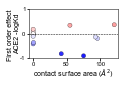

In [27]:
toplot = pd.DataFrame(pd.read_csv('structure_output/firstorder_summaryACE2.csv',delimiter=','))
antigen="ACE2"
#H1 scatter
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['scatter.edgecolors'] = 'black'
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
fig, ax = plt.subplots(figsize=(1.6,0.9))
plt.ylim(-1.0,1.0)
plt.tick_params(labelsize=6,length=2.5,pad=1)
y_locator = FixedLocator([-1,0,1])
ax.yaxis.set_major_locator(y_locator)
ax.set_yticklabels(['-1','0','1'])
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
cmap = cm.get_cmap("bwr")
x=toplot['buriedSA']
y=toplot['%s_Effect' % antigen]
p1=sns.scatterplot(x=x,
            y=y,
            data=toplot,
            palette="bwr",
            hue_norm=(-1,1),
            x_jitter=True,
            marker='o',
            edgecolor='black',
            linewidth=0.25,
            size=4,
            hue='%s_Effect' % antigen)


#sort dataframe to only label outliers
toplot_s = toplot.iloc[(-toplot['buriedSA'].abs()).argsort()].reset_index(drop=True)
# lim=4
# for line in range(0,lim):
#     if antigen=="ACE2":
#         ax.text(toplot_s.buriedSA[line], toplot_s.ACE2_Effect[line]+0.2, toplot_s.Term[line], horizontalalignment='center', fontsize=6, color='black')

#plt.title('%s' % antigen,fontsize=8,weight='bold')
plt.xlabel('contact surface area ($\AA^2$)',fontsize=7,labelpad=0)
plt.legend([],[], frameon=False)

#plt.legend(loc="upper center", bbox_to_anchor=(1.1, 1.1), ncol=1, fontsize=7,markerscale=0.5)
plt.axhline(y=0,linestyle='dashed',c='black',linewidth=0.5)
plt.ylabel('First order effect \nACE2 -logKd',fontsize=7,labelpad=0)
plt.savefig('images/RBD_%s_linear_BSA.png' % antigen, transparent=True, dpi=1200,bbox_inches='tight')

### Figure 3f

In [20]:
model = "biochem"
plotting = "pairwise"
#import kl second order effects from second order model
mut_names = ['339','371','373','375','417','440','446','477','478','484','493','496','498','501','505']
if antigen == "ACE2":
    h1 = pd.read_table('ACE2_4order_biochem.txt',names=['Term','ACE2_Effect','ACE2_SE','pval','ACE2_95CI_low','ACE2_95CI_hi'],skiprows=[0,1,2,3],index_col=False)
    h1['order'] = h1[['Term']].applymap(lambda x: str.count(x, ',')+1)
    h1_pairwise = h1[h1['order']==2]
    h1_pairwise[['Mutation 1','Mutation 2']] = h1_pairwise.Term.str.split(",",expand=True)
    toplot = pd.DataFrame()
    toplot = h1_pairwise[['Mutation 1','Mutation 2','ACE2_Effect','ACE2_SE','ACE2_95CI_low','ACE2_95CI_hi']].copy()
    toplot['Mutation 1'] = toplot['Mutation 1'].replace({'1':'mut339','2':'mut371','3':'mut373','4':'mut375','5':'mut417','6':'mut440','7':'mut446','8':'mut477','9':'mut478','10':'mut484','11':'mut493','12':'mut496','13':'mut498','14':'mut501','15':'mut505'})
    toplot['Mutation 2'] = toplot['Mutation 2'].replace({'1':'mut339','2':'mut371','3':'mut373','4':'mut375','5':'mut417','6':'mut440','7':'mut446','8':'mut477','9':'mut478','10':'mut484','11':'mut493','12':'mut496','13':'mut498','14':'mut501','15':'mut505'})
    mask = (toplot['ACE2_95CI_low'] <= 0) & (toplot['ACE2_95CI_hi'] >=0)
    toplot['ACE2_Effect'][mask] = 0

/Users/angelaphillips/opt/anaconda3/envs/pymol_v2/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/angelaphillips/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [21]:
toplot

,Mutation 1,Mutation 2,ACE2_Effect,ACE2_SE,ACE2_95CI_low,ACE2_95CI_hi
15,mut339,mut371,0.000000,0.023865,-0.100393,0.100485
16,mut339,mut373,0.000000,0.023864,-0.099167,0.101707
17,mut339,mut375,-0.122451,0.023865,-0.222890,-0.022011
18,mut339,mut417,0.000000,0.023864,-0.082034,0.118840
19,mut339,mut440,0.000000,0.023865,-0.086391,0.114489
...,...,...,...,...,...,...
115,mut496,mut501,0.793600,0.023865,0.693161,0.894038
116,mut496,mut505,0.115470,0.023864,0.015033,0.215907
117,mut498,mut501,0.359689,0.023865,0.259250,0.460128
118,mut498,mut505,0.480801,0.023864,0.380364,0.581238


### Measure distance between alpha carbons

In [22]:
distance_log=[]
loc_muta = list(toplot['Mutation 1'])
loc_mutb = list(toplot['Mutation 2'])
epistasis = list(toplot['%s_Effect' % antigen])
labels=[]
for l in range(len(loc_muta)):
    var1=loc_muta[l]
    var2=loc_mutb[l]
    label = str(var1[3:])+','+str(var2[3:])
    labels.append(label)
    distance=cmd.distance(None, "%s and n. CA"%var1, "%s and n. CA"%var2) #distance between alpha carbons
    distance_log.append(distance)
df_toplot=pd.DataFrame()
df_toplot['labels']=labels
df_toplot['distance']=distance_log
df_toplot['epistasis']= epistasis
df_toplot.dropna(inplace=True)
s = df_toplot.sort_values(by='epistasis',ascending=False)
s.to_csv('structure_output/2ndorder_summary%s.csv'% antigen,index=False)

In [24]:
df_toplot_s

,labels,distance,epistasis
0,"496,501",10.076168,0.793600
1,"501,505",5.971085,0.680510
2,"498,505",7.349566,0.480801
3,"496,498",6.448214,0.469528
4,"498,501",5.799448,0.359689
...,...,...,...
100,"375,440",15.400415,0.000000
101,"375,417",23.438784,0.000000
102,"373,505",13.742696,0.000000
103,"373,498",18.589172,0.000000


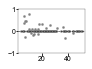

In [28]:
#sort dataframe to only label outliers
df_toplot_s = df_toplot.iloc[(-df_toplot['epistasis'].abs()).argsort()].reset_index(drop=True)

#number of outliers to label
if antigen=="ACE2":
    spot = "gray"
    edge = "gray"
lim = 5
%matplotlib inline
import matplotlib as mpl
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.25
fig, ax = plt.subplots(figsize=(1.2,0.8))
plt.tick_params(labelsize=7,length=2.5,pad=0.5)
#Create figure
# Create scatterplot. alpha controls the opacity and s controls the size.
ax = sns.scatterplot(df_toplot_s.distance, df_toplot_s.epistasis, alpha = 1, linewidth=0.25,color=spot,edgecolor=edge,s=5,legend=False)

#plt.title('%s' % antigen,fontsize=8,weight='bold')
plt.axhline(y=0,linestyle='dashed',c='black',linewidth=0.5)
plt.ylim(-1,1)
ax.set_xlabel('',fontsize=7,labelpad=0)
if plotting == "sum":
    ax.set_ylabel('weighted epistasis',fontsize=7)
else:
    ax.set_ylabel('',fontsize=7,labelpad=0)

plt.savefig('images/rbd_%s_2ndorder_structure.png'% antigen, transparent=True, dpi=600,bbox_inches='tight')

### Bin by distances for SI Fig #

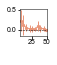

In [25]:
df_toplot_pos = df_toplot_s.copy()
df_toplot_pos['epistasis']=df_toplot_pos['epistasis'].abs()

plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
fig, ax = plt.subplots(figsize=(0.5,0.5))
plt.tick_params(labelsize=7,length=2.5,pad=0.1)
y = df_toplot_pos.groupby(pd.cut(df_toplot_pos['distance'], bins=10))['epistasis'].mean()
yerr = df_toplot_pos.groupby(pd.cut(df_toplot_pos['distance'], bins=10))['epistasis'].std()
x = df_toplot_pos.groupby(pd.cut(df_toplot_pos['distance'], bins=10))['distance'].mean()
plt.scatter(x,y,color=spot,s=5)
plt.errorbar(x,y,yerr,color=spot,linewidth=1)
plt.axhline(y=0,linestyle='dashed',c='black',linewidth=0.5)
plt.xlabel(' ')
plt.ylabel('')
plt.savefig('images/RBD_%s_2ndorder_structure_binned.png'% antigen, transparent=True, dpi=600,bbox_inches='tight')


### permute the distances for null expectation

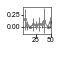

In [26]:
#permute for control
df_toplot_pos = df_toplot_s.copy()
df_toplot_pos['epistasis']=df_toplot_pos['epistasis'].abs()
df_toplot_pos['permuted'] = np.random.permutation(df_toplot_pos['distance'].values)
fig, ax = plt.subplots(figsize=(0.5,0.5))
plt.tick_params(labelsize=7,length=2.5,pad=0.1)
y = df_toplot_pos.groupby(pd.cut(df_toplot_pos['permuted'], bins=10))['epistasis'].mean()
yerr = df_toplot_pos.groupby(pd.cut(df_toplot_pos['permuted'], bins=10))['epistasis'].std()
x = df_toplot_pos.groupby(pd.cut(df_toplot_pos['permuted'], bins=10))['permuted'].mean()
plt.scatter(x,y,color='gray',s=5)
plt.errorbar(x,y,yerr,color='gray',linewidth=1)
plt.axhline(y=0,linestyle='dashed',c='black',linewidth=0.5)
plt.xlabel(' ')
plt.ylabel('')
plt.savefig('images/RBD_%s_2ndorder_structure_binned_permuted.png'% antigen, transparent=True, dpi=600,bbox_inches='tight')
